# Examining Data (Thyroid Dataset)

This uses the UCI Machine learning dataset on Thyroid disease found here https://archive.ics.uci.edu/ml/datasets/thyroid+disease. The files to be used are as follows:

* `ann-train.data`: Source for training data
* `ann-test.data`: Source for testing the data against a model
* `ann-Readme`: Narrative for the dataset
* `ann-thyroid.names`: Meta information on the dataset

## Objectives

* Read the data as a raw file using Pandas library
* Examine missing values
* Examine attributes and its distribution
* Create an output which is the cleaned up file for use later on

## Narrative

*(Taken from Readme)* The problem is to determine whether a patient referred to the clinic is
hypothyroid. Therefore three classes are built: normal (not hypothyroid),
hyperfunction and subnormal functioning. Because 92 percent of the patients
are not hyperthyroid a good classifier must be significant better than 92%.

### Data Attributes

The file seems to already be normalized so no normalization transformation is required. However, according to specs, we need indicate and use the following **21** attributes (dimensionality of 21) partaining to the following:

* **x0**
* **x2**
* **x3**
* **x4**
* **x5**
* **x6**
* **x7**
* **x8**
* **x9**
* **x10**
* **x11**
* **x12**
* **x13**
* **x14**
* **x15**
* **x16**
* **x17**
* **x18**
* **x19**
* **x20**
* **x21**

We'd like to represent therefore our dataset `X` as a set / list / array of datapoints where:

$X_i = { x_0 ... x_{20} }$

### Data Labels

The last column partains to the classification with one of three possible values:

* **1**: Hyperfunction (abnormal state)
* **2**: Subnormal
* **3**: Normal

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
from scipy.stats import iqr

## Reading a CSV file using Pandas

In this section we store the data as is using the variables `df_train` and `df_test`. The `read_csv()` function from pandas will take in a CSV file and convert it to a dataframe for examination later on. Some things to consider when calling this function against the `ann-train.data` file:

1. The file is space delimited file and not a comma delimited file. Therefore, we have to explicitly define an extra parameter in the `read_csv` function called `delimiter` whose value is a space to indicate the delimiter to be used when parasing the file.
2. There are no headers in the file *(first row is the first data entity / data point of the dataset)*. By default, `read_csv` will use the first row as the column names. We can specify `header=None` as a parameter to the function so the default columns will be from `0` to `n-1` where `n` is the length of the columns of a dataframe.

Documentation:https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
# Variables to specify the path of the files (currently in the current directory)
csv_file_train = "./ann-train.data"
csv_file_test = "./ann-test.data"

# Store the training and test data
df_train = pd.read_csv(csv_file_train, header=None, delimiter=' ')
df_test = pd.read_csv(csv_file_test, header=None, delimiter=' ')

## Displaying Initial Data

We can examine the data frame by calling the `head(n)` method of the dataframe object or `tail(n)` method. The `head` method displays first `n` number of rows whereas the `tail` method displays the last `n` number of rows.

In [3]:
n = 5

df_train.head(n)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0.00060,0.015,0.120,0.082,0.146,3,NaN,NaN
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.030,0.143,0.133,0.108,3,NaN,NaN
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0.00190,0.024,0.102,0.131,0.078,3,NaN,NaN
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0.00090,0.017,0.077,0.090,0.085,3,NaN,NaN
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.026,0.139,0.090,0.153,3,NaN,NaN


## Cleaning Up Invalid Parsing

There should be only 21 columns for the data attributes and 1 column for the actual label (classification) according to the dataset. However `head` shows that there are 24 columns in total with attributes **22** and **23** having `NaN` *(not a number)* values. 

Upon examining the raw file `ann-train.data` each row actually has trailing spaces so when `read_csv` was invoked, it treated the spaces as columns. An initial cleanup would be to simply remove attributes **22** and **23**.

We can drop columns using the `drop()` function of a given data frame. The function accepts a parameter `columns` whose value is an array of columns we'd like to drop. Take note that by default, it won't change the original data frame so we need the result of `drop()` to be passed to another variable. We could recycle the `df_train` and `df_test` respectively and ust re-assign the results of the method. We'll also need to pass an `axis` parameter

Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [4]:
# Fix df_train
df_train = df_train.drop(columns=[22, 23], axis=1)

# Fix df_test
df_test = df_test.drop(columns=[22, 23], axis=1)

# Check the result
df_train.head(n)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [5]:
# Method returns the bin width for the histogram of a range of values
# Reference: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
def freedman_diaconis(vals):
    return 2 * (iqr(vals) / (len(vals) ** (1./3)))

0.03982915825207569
24


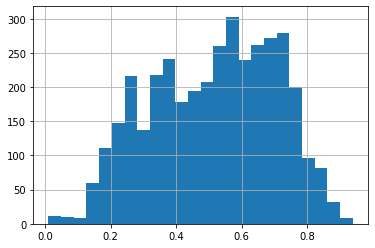

In [9]:
bin_width = freedman_diaconis(df_train[0].values)
print(bin_width)

num_bins = int((np.amax(df_train[0].values) + bin_width) / bin_width)
print(num_bins)

hist = df_train[0].hist(bins=num_bins)